In [48]:
import pandas as pd
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

## Load data

In [49]:
dfm = pd.read_csv('data/main.csv')
dfa = pd.read_csv('data/alt.csv')

In [50]:
dfm.drop(['Unnamed: 0'], axis=1, inplace=True)
dfm

,participant,question,trial,RT,modality
0,0,0,0,414.385370,image
1,0,0,1,406.073693,image
2,0,0,2,421.354407,image
3,0,0,3,423.027911,image
4,0,0,4,416.700589,image
...,...,...,...,...,...
199995,99,19,45,405.355791,word
199996,99,19,46,407.682957,word
199997,99,19,47,408.993238,word
199998,99,19,48,400.677449,word


In [51]:
summary_stats = dfm.groupby(['question', 'modality'])['RT'].agg(['mean', 'std'])
print(summary_stats)

                         mean       std
question modality                      
0        image     414.971447  3.959738
         word      440.057331  5.142712
1        image     411.034162  3.844590
         word      435.992485  5.211216
2        image     419.958608  3.919159
         word      445.093216  5.115601
3        image     383.971964  3.894728
         word      408.952113  5.110007
4        image     406.077875  3.893847
         word      431.076361  5.229836
5        image     407.959431  3.865805
         word      432.997938  5.214379
6        image     377.078288  3.923003
         word      401.987556  5.207252
7        image     381.928920  3.952766
         word      407.002719  5.195072
8        image     374.946839  3.904631
         word      399.893048  5.147489
9        image     388.957490  3.965422
         word      413.972151  5.318146
10       image     401.015020  3.879508
         word      426.096813  5.204200
11       image     412.989282  3.908685


In [52]:
# Fit a linear mixed-effects model
model = smf.mixedlm("RT ~ modality * question", dfm, groups=dfm["participant"])
result = model.fit()
print(result.summary())

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                  Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      RT          
No. Observations:      200000       Method:                  REML        
No. Groups:            100          Scale:                   199.1467    
Min. group size:       2000         Log-Likelihood:          -813202.1632
Max. group size:       2000         Converged:               Yes         
Mean group size:       2000.0                                            
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 402.875    0.086 4684.311 0.000 402.706 403.043
modality[T.word]           25.050    0.122  205.955 0.000  24.812  25.289
question                   -0.566    0.008  -73.126 0.000  -0.581  -0.551
modality[T.word]:question  -0.007    0.011   -0.638 0.52

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


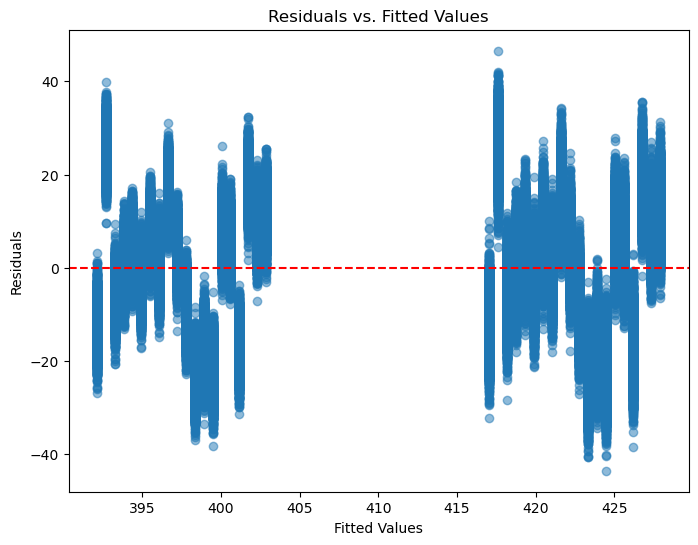

In [53]:
# Residuals
residuals = result.resid  # Residuals from the fitted model

fitted = result.fittedvalues  # Fitted values from the model
plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


/var/folders/0c/z85ggvbd1g38q3ftn660791w0000gq/T/ipykernel_88877/2191822410.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=dfm, x='question', y='RT', hue='modality', ci='sd', markers=["o", "s"])


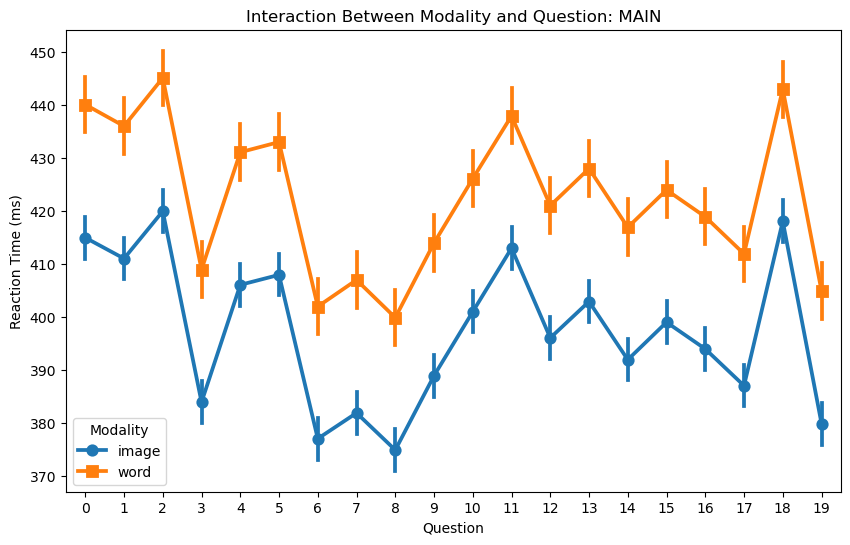

In [54]:
# inter
plt.figure(figsize=(10, 6))
sns.pointplot(data=dfm, x='question', y='RT', hue='modality', ci='sd', markers=["o", "s"])
plt.title('Interaction Between Modality and Question: MAIN')
plt.xlabel('Question')
plt.ylabel('Reaction Time (ms)')
plt.legend(title='Modality')
plt.show()

In [55]:
dfa.drop(['Unnamed: 0'], axis=1, inplace=True)
dfa

,participant,question,trial,RT,modality
0,0,0,0,349.484661,image
1,0,0,1,354.444444,image
2,0,0,2,353.482871,image
3,0,0,3,344.006231,image
4,0,0,4,340.939647,image
...,...,...,...,...,...
199995,99,19,45,432.677928,word
199996,99,19,46,435.440100,word
199997,99,19,47,437.765349,word
199998,99,19,48,441.045991,word


In [56]:
summary_stats2 = dfa.groupby(['question', 'modality'])['RT'].agg(['mean', 'std'])
print(summary_stats2)

                         mean       std
question modality                      
0        image     348.017943  3.838728
         word      416.936885  5.165603
1        image     337.944482  3.971104
         word      414.000849  5.065392
2        image     313.989065  3.909250
         word      411.924911  5.060050
3        image     325.970276  3.920931
         word      444.885725  5.073369
4        image     319.051736  3.993958
         word      428.136622  5.142861
5        image     315.967055  3.946765
         word      408.975931  5.148030
6        image     345.043803  3.869460
         word      439.966640  5.149847
7        image     309.004975  3.893472
         word      423.940309  5.194846
8        image     349.993923  3.869561
         word      406.934251  5.131831
9        image     311.123133  3.856480
         word      426.137813  5.167957
10       image     335.972375  3.871787
         word      420.969246  5.171030
11       image     320.905523  4.005612


In [57]:
# Fit a linear mixed-effects model
model = smf.mixedlm("RT ~ modality * question", dfa, groups=dfm["participant"])
result = model.fit()
print(result.summary())

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


                  Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      RT          
No. Observations:      200000       Method:                  REML        
No. Groups:            100          Scale:                   209.5227    
Min. group size:       2000         Log-Likelihood:          -818281.0988
Max. group size:       2000         Converged:               Yes         
Mean group size:       2000.0                                            
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 328.190    0.088 3720.247 0.000 328.017 328.363
modality[T.word]           92.445    0.125  740.994 0.000  92.200  92.689
question                    0.402    0.008   50.639 0.000   0.386   0.418
modality[T.word]:question  -0.205    0.011  -18.217 0.00

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


/var/folders/0c/z85ggvbd1g38q3ftn660791w0000gq/T/ipykernel_88877/551398185.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=dfa, x='question', y='RT', hue='modality', ci='sd', markers=["o", "s"])


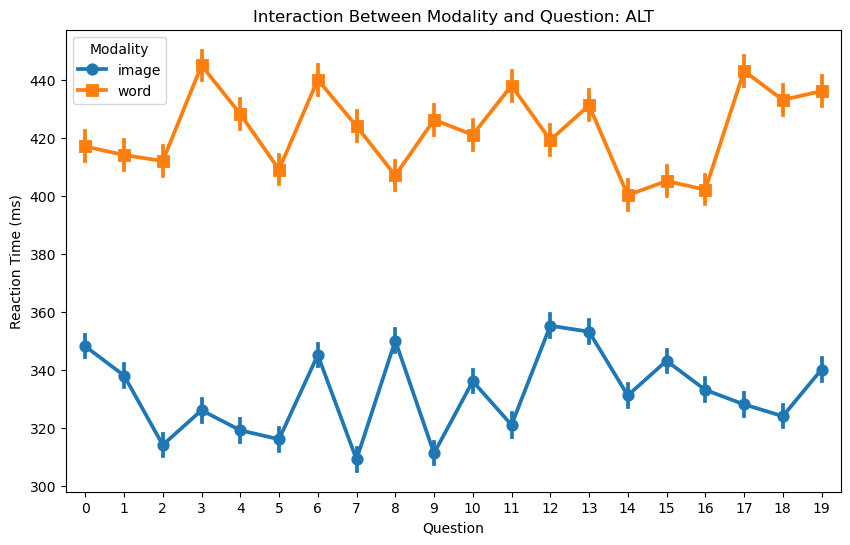

In [58]:
# inter
plt.figure(figsize=(10, 6))
sns.pointplot(data=dfa, x='question', y='RT', hue='modality', ci='sd', markers=["o", "s"])
plt.title('Interaction Between Modality and Question: ALT')
plt.xlabel('Question')
plt.ylabel('Reaction Time (ms)')
plt.legend(title='Modality')
plt.show()


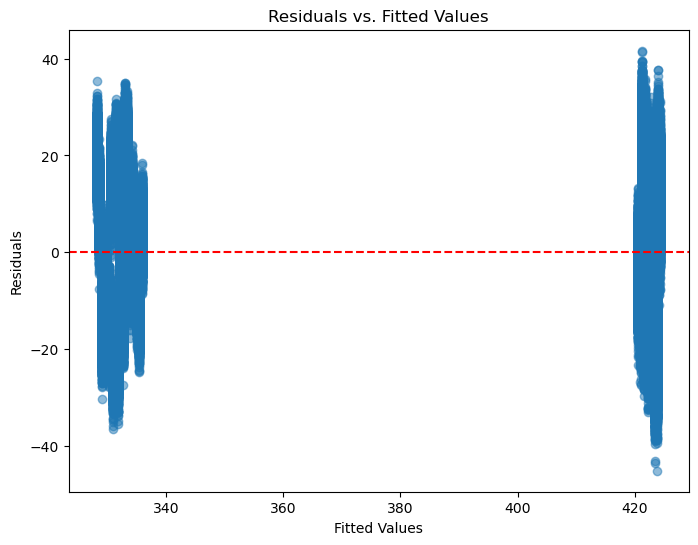

In [59]:
residuals = result.resid  # Residuals from the fitted model

fitted = result.fittedvalues  # Fitted values from the model
plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
